In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
cancer = load_breast_cancer()

In [3]:
df2 = pd.Series(cancer['target'])

In [4]:
df2

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [5]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [6]:
df = df.merge(df2.rename('result'), left_index=True, right_index=True)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
result                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
X = df.drop(['result'], axis=1)
y = df['result']

In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.shape

(569, 30)

In [13]:
# Perform PCA with 5 components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

In [14]:
X_pca.shape

(569, 5)

Text(0, 0.5, 'Second Principal Component')

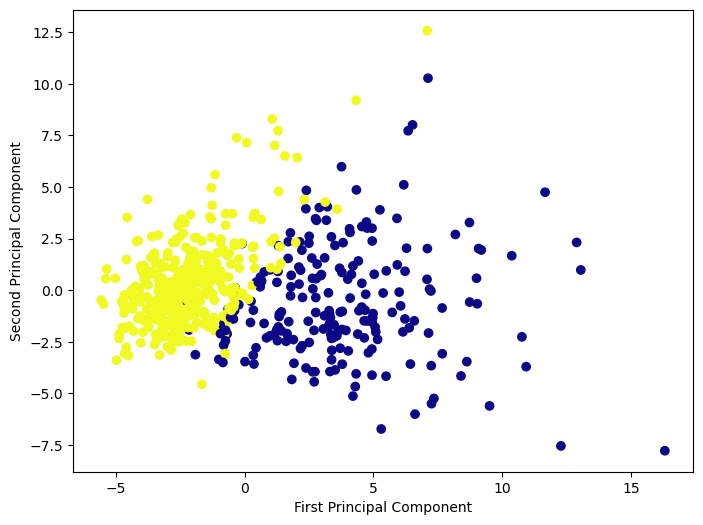

In [15]:
# Create a scatter plot
plt.figure(figsize =(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = df['result'], cmap ='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [16]:
# components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919 ,
        -0.07409157,  0.00273383, -0.02556355, -0

<Axes: >

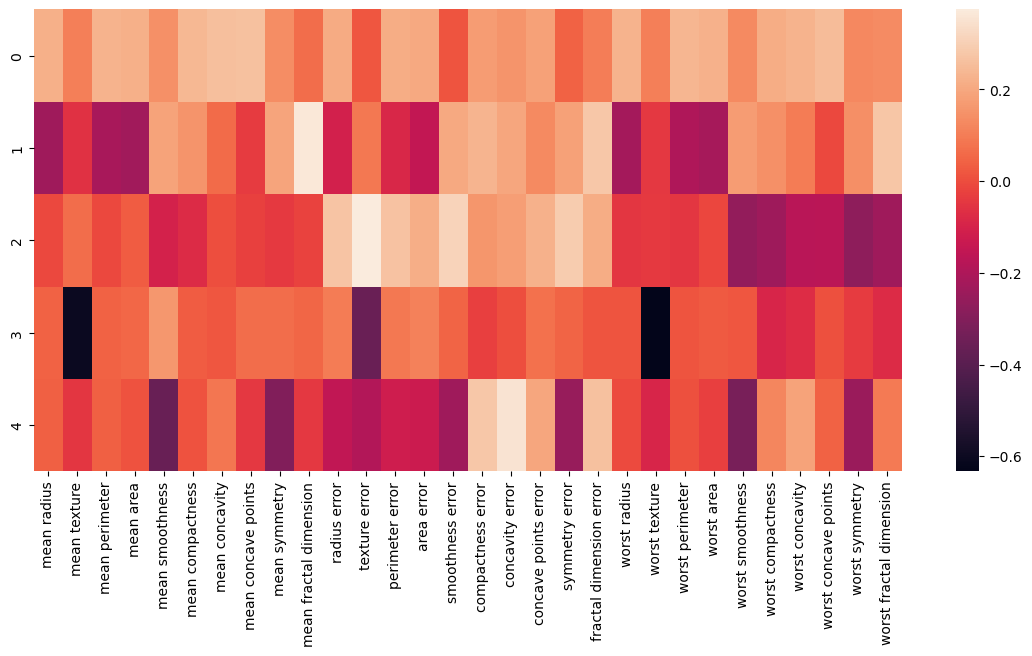

In [17]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
plt.figure(figsize =(14, 6))
sns.heatmap(df_comp)

# Before PCA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [19]:
X_train.shape

(381, 30)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [25]:
# Calculate the mean squared error and R-squared value
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
accuracy = lr.score(X_test, y_test)

In [26]:
# Print the results
print("Mean squared error: {:.2f}".format(mse))
print("Root mean squared error: {:.2f}".format(rmse))
print("R-squared value: {:.2f}".format(r2))
print("Accuracy is: {:.2f}".format(accuracy))

Mean squared error: 0.07
Root mean squared error: 0.27
R-squared value: 0.69
Accuracy is: 0.69


# After PCA

In [27]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca, y, test_size=0.33, random_state=42)

In [28]:
X_train_2.shape

(381, 5)

In [29]:
lr.fit(X_train_2, y_train_2)

LinearRegression()

In [30]:
y_pred_2 = lr.predict(X_test_2)

In [31]:
mse = mean_squared_error(y_test_2, y_pred_2)
rmse = mean_squared_error(y_test_2, y_pred_2, squared=False)
r2 = r2_score(y_test_2, y_pred_2)
accuracy = lr.score(X_test_2, y_test_2)

In [32]:
print("Mean squared error: {:.2f}".format(mse))
print("Root mean squared error: {:.2f}".format(rmse))
print("R-squared value: {:.2f}".format(r2))
print("Accuracy is: {:.2f}".format(accuracy))

Mean squared error: 0.07
Root mean squared error: 0.26
R-squared value: 0.70
Accuracy is: 0.70
